### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
#import numpy as np
import matplotlib.pyplot as plt
import statsmodels
#from scipy import stats

#logistic regression
import statsmodels.api as sm
from patsy import dmatrices
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import auc, accuracy_score, confusion_matrix, precision_recall_fscore_support, roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.cross_validation import cross_val_score
from sklearn import datasets, linear_model, cross_validation, grid_search
from sklearn.metrics import r2_score

### Read in data 

In [4]:
df = pd.read_csv('/Users/karigoodman/Dropbox/InsightHealthDataScience/projects/data/general/NFL_scaledData.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 26 columns):
Unnamed: 0        157 non-null int64
user_id           157 non-null int64
classifier_RC     157 non-null int64
classifier_hyb    157 non-null int64
HSC               157 non-null int64
LSC               157 non-null int64
yrs_in_lg         157 non-null float64
Seasons           157 non-null float64
year_end          157 non-null float64
age               157 non-null float64
var_ofMean        157 non-null float64
oneMean           157 non-null float64
twoMean           157 non-null float64
sixMean           157 non-null float64
sevenMean         157 non-null float64
eightMean         157 non-null float64
nineMean          157 non-null float64
tenMean           157 non-null float64
elevMean          157 non-null float64
twelMean          157 non-null float64
thirtMean         157 non-null float64
threeMean         157 non-null float64
fourMean          157 non-null float64
fiveMean  

### Calculate correlation among variables to identify any that are correlated above 0.75

In [6]:
features = df[['Seasons','age','var_ofMean','oneMean','twoMean','threeMean','fourMean','fiveMean',
          'sixMean','sevenMean','eightMean','nineMean','tenMean','elevMean','twelMean','thirtMean',          
          'fourtMean','fiftMean']]

corr =  features.corr()
corr.loc[:,:] =  np.tril(corr, k=-1)
corr = corr.stack()
corr[corr > 0.75]

fiveMean   fourMean     0.849416
eightMean  sevenMean    0.783724
elevMean   fourMean     0.784808
           fiveMean     0.846910
fourtMean  thirtMean    0.774716
fiftMean   tenMean      0.943816
dtype: float64

### Plot a correlation matrix

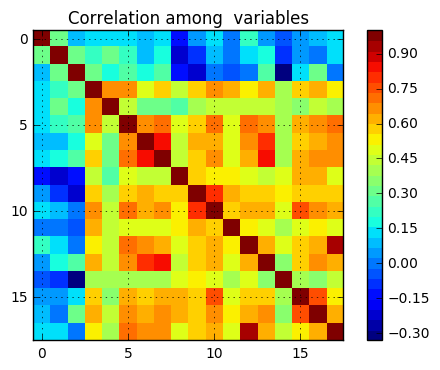

In [7]:
def correlation_matrix(df):
   import numpy as np
   from matplotlib import pyplot as plt
   from matplotlib import cm as cm

   fig = plt.figure()
   ax1 = fig.add_subplot(111)
   cmap = cm.get_cmap('jet', 30)
   cax = ax1.imshow(features.corr(), interpolation="nearest", cmap=cmap)
   ax1.grid(True)
   plt.title('Correlation among  variables')
#    labels=['Seasons','year_end','age','var_ofMean','oneMean','twoMean','threeMean','fourMean','fiveMean',
#           'sixMean','sevenMean','eightMean','nineMean','tenMean','elevMean','twelMean','thirtMean',          
#           'fourtMean','fiftMean']
#    ax1.set_xticklabels(labels,fontsize=4)
#    ax1.set_yticklabels(labels,fontsize=4)
   # Add colorbar, make sure to specify tick locations to match desired ticklabels
   cbar = fig.colorbar(cax)
   plt.show()
#, ticks=[-1.00, -0.75, -0.50, -0.25, 0,.25,.5,.75,1]

correlation_matrix(features)

### Select out data where individuals are unclassified (==2), leaving only those with classifications

In [8]:
df2 = df[df.classifier_hyb != 2]
#df2.info()

### Create a matrix of the desired data and split it into test and training data

In [9]:
featuresFULL = df2[['user_id','HSC', 'LSC', 'Seasons', 'age', 'var_ofMean', 'oneMean', 'twoMean', 
                    'threeMean', 'sixMean', 'sevenMean',
                    'nineMean', 'tenMean','twelMean', 'thirtMean',
                    'fourtMean']].as_matrix()
targetFULL = df2[['user_id', 'classifier_hyb']].as_matrix()
f_trainFULL, f_testFULL, t_train, t_test = train_test_split(featuresFULL, targetFULL, test_size=0.20, random_state=0)
t_trainFULL = t_train[:,[1]]
t_testFULL = t_test[:,[1]]

In [ ]:
#X = f_trainFULL[['HSC','Recall Memory (Visual)','Visual Information Processing',
#                  'Recall Memory (Auditory)', 'Working Memory (Spatial Recall)', 
#                  'Multi-Systems Integration']]
# sorted_renamed = sorted_imp_features.replace({'Model Features': {'HSC':  'High-Speed Contact Position', 
#                            'oneMean': "Recall Memory (Visual)", 'tenMean': 'Visual Information Processing',
#                            'twoMean': 'Recall Memory (Auditory)', 'sevenMean': 'Working Memory (Spatial Recall)', 
#                            'twelMean': 'Multi-Systems Integration'}})


#X = f_trainFULL[:,[0,5,6,9,11,12]]

In [10]:
f_trainFULL.shape

(123, 16)

In [11]:
f_testFULL_R = f_testFULL.ravel()
t_testFULL_R = t_testFULL.ravel()

In [12]:
f_trainFULL

array([[  1.89000000e+03,   1.00000000e+00,   0.00000000e+00, ...,
         -1.09959377e+00,   1.43208798e+00,   6.46879795e-01],
       [  1.93600000e+03,   0.00000000e+00,   1.00000000e+00, ...,
         -1.08067276e+00,  -5.93524141e-01,   8.97309328e-01],
       [  2.08900000e+03,   1.00000000e+00,   0.00000000e+00, ...,
         -1.09959377e+00,   6.87842281e-01,  -2.33874840e-02],
       ..., 
       [  1.80200000e+03,   1.00000000e+00,   0.00000000e+00, ...,
         -1.16014102e+00,  -4.94057341e-01,  -1.22643132e+00],
       [  2.09700000e+03,   0.00000000e+00,   1.00000000e+00, ...,
         -1.09959377e+00,   9.33583786e-01,   1.06303475e+00],
       [  2.11500000e+03,   1.00000000e+00,   0.00000000e+00, ...,
         -4.83309299e-01,  -1.21790817e+00,  -1.03878454e+00]])

### Save the user IDs and classifications into a dataframe to be combined back later

In [13]:
#keep all the user IDs and classifications in a dataframe for later
userID_class = pd.DataFrame(targetFULL)
userID_class.columns = ['user_id','classification']

#keep just the test user IDs and classifications in a dataframe for later
test_userID_class = pd.DataFrame(t_test)
test_userID_class.columns = ['user_id','classification']

### Instantiate a logistic regression model, and fit with X and y

In [18]:
model = LogisticRegression(penalty='l1',C=0.5, random_state=4)
model_fit = model.fit(f_trainFULL, t_trainFULL.ravel())

# check the accuracy on the training and test sets
print model_fit.score(f_trainFULL, t_trainFULL.ravel()), model_fit.score(f_testFULL, t_testFULL.ravel())

0.79674796748 0.838709677419


In [33]:
#r2 
#r2_score(t_testFULL, predicted)  

In [20]:
y_arr = t_trainFULL.ravel()
y_arr.shape

(123,)

### Evaluate the model using 10-fold cross-validation

In [21]:
cv_scores = cross_val_score(LogisticRegression(penalty='l1', C=0.5, random_state=4), 
                            f_trainFULL, y_arr, scoring='accuracy', cv=10)
print cv_scores
print cv_scores.mean()

[ 0.92307692  0.76923077  0.76923077  0.61538462  0.75        0.83333333
  0.5         0.66666667  0.91666667  0.81818182]
0.756177156177


### Inspect model coefficients

In [22]:
model.coef_
coef_transpose = np.transpose(model.coef_)
features = df2[['HSC', 'LSC', 'Seasons', 'age', 'var_ofMean', 'oneMean', 'twoMean', 
                    'threeMean',  'sixMean', 'sevenMean',
                    'eightMean', 'nineMean', 'tenMean',  'twelMean', 'thirtMean',
                    'fourtMean']]
feature_nm=list(features)
feature_names = pd.DataFrame(feature_nm)
coefficients = pd.DataFrame(coef_transpose)
feature_coef = pd.merge(left=feature_names, right=coefficients, left_index=True, right_index=True)
feature_coef.columns = ['Model Features','coefficients'] 
sorted = feature_coef.sort_values(by='coefficients', ascending=0)
sorted

,Model Features,coefficients
1,LSC,0.301896
2,Seasons,0.000000
4,var_ofMean,0.000000
5,oneMean,0.000000
8,sixMean,0.000000
9,sevenMean,0.000000
11,nineMean,0.000000
12,tenMean,0.000000
15,fourtMean,0.000000
0,HSC,-0.000610


### Reduce the set of features to just plot the important ones

In [23]:
sorted2 = sorted.iloc[[0]]
sorted3 = sorted.iloc[10:15]
sorted_imp_features = pd.concat([sorted2, sorted3], axis=0)
sorted_renamed = sorted_imp_features.replace({'Model Features': {'HSC':  'High-Speed Contact Position', 
                           'oneMean': "Recall Memory (Visual)", 'tenMean': 'Visual Information Processing',
                           'twoMean': 'Recall Memory (Auditory)', 'sevenMean': 'Working Memory (Spatial Recall)', 
                           'twelMean': 'Multi-Systems Integration'}})
sorted_renamed

,Model Features,coefficients
1,LSC,0.301896
3,age,-0.059383
14,thirtMean,-0.094106
13,Multi-Systems Integration,-0.175543
10,eightMean,-0.389239
6,Recall Memory (Auditory),-0.415714


### Plot the results

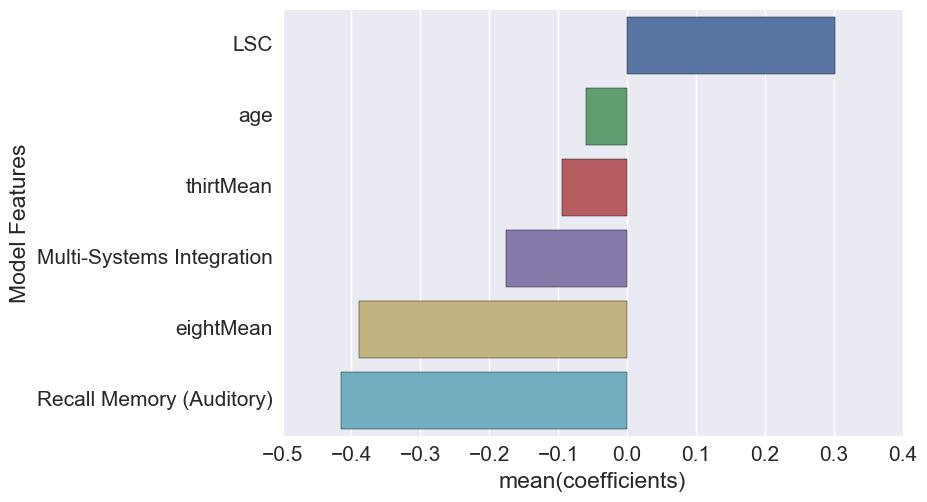

In [24]:
import seaborn as sns
sns.set_style("whitegrid")
tips = sns.load_dataset("tips")

sns.set(font_scale=1.5)
ax = sns.barplot(x="coefficients", y="Model Features", data=sorted_renamed)

### Calculate correlation among these variables to ensure none are correlated above 0.75 - as expected, none are.

In [25]:
featuresFULL = df2[['HSC',  'oneMean', 'twoMean', 'sevenMean','twelMean']]

corr =  featuresFULL.corr()
corr.loc[:,:] =  np.tril(corr, k=-1)
corr = corr.stack()
corr[corr > 0.75]

Series([], dtype: float64)

In [29]:
train_features.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1890.0,1.0,0.0,1.325174,-0.596466,-0.026240,0.220471,-0.946889,0.125720,1.152248,1.061059,1.133625,0.712520,-1.099594,1.432088,0.646880
1,1936.0,0.0,1.0,-0.945520,0.067684,1.632296,-0.538470,-0.494453,-1.265175,0.387059,-1.358391,-0.284778,-0.767869,-1.080673,-0.593524,0.897309
2,2089.0,1.0,0.0,-0.661683,-0.015335,-0.448337,-0.348735,0.242468,1.266725,0.925663,1.049592,0.323109,0.865663,-1.099594,0.687842,-0.023387
3,2110.0,1.0,0.0,0.757501,-0.762504,-0.690166,-1.155110,-1.351339,-1.321753,-0.578715,-0.962794,0.167904,-0.002151,0.716824,-0.312677,-0.391666
4,2259.0,1.0,0.0,-1.229357,-1.758729,-0.934645,-0.668913,0.002540,-0.713532,0.554212,-0.205999,-0.414116,-0.597709,-0.115701,-0.716395,0.123924


In [28]:
#turn arrays into dataframes to combine into one 
train_features = pd.DataFrame(f_trainFULL) #15 columns
train_class = pd.DataFrame(t_trainFULL) #1 column
trainingset = pd.merge(left=train_class, right=train_features, left_index=True, right_index=True)

#then add column titles
trainingset.columns = ['true classification','user_id','Position: High Speed Contact', 'Low-Speed Contact Pos.',
     '# Seasons', 'Age', 'Variation Among Tasks', 'oneMean', 
     'twoMean', 'threeMean', 'sixMean','sevenMean',
     'nineMean', 'tenMean', 'twelveMean', 'thirtMean','fourtMean'] 

# #now export to csv
trainingset.to_csv('/Users/karigoodman/Dropbox/InsightHealthDataScience/projects/data/general/NFL_trainingData.csv')

# ##turn user_id to integer
# trainingset1['user_id'].astype(int)
trainingset.head()

,true classification,user_id,Position: High Speed Contact,Low-Speed Contact Pos.,# Seasons,Age,Variation Among Tasks,oneMean,twoMean,threeMean,sixMean,sevenMean,nineMean,tenMean,twelveMean,thirtMean,fourtMean
0,1,1890.0,1.0,0.0,1.325174,-0.596466,-0.026240,0.220471,-0.946889,0.125720,1.152248,1.061059,1.133625,0.712520,-1.099594,1.432088,0.646880
1,1,1936.0,0.0,1.0,-0.945520,0.067684,1.632296,-0.538470,-0.494453,-1.265175,0.387059,-1.358391,-0.284778,-0.767869,-1.080673,-0.593524,0.897309
2,1,2089.0,1.0,0.0,-0.661683,-0.015335,-0.448337,-0.348735,0.242468,1.266725,0.925663,1.049592,0.323109,0.865663,-1.099594,0.687842,-0.023387
3,1,2110.0,1.0,0.0,0.757501,-0.762504,-0.690166,-1.155110,-1.351339,-1.321753,-0.578715,-0.962794,0.167904,-0.002151,0.716824,-0.312677,-0.391666
4,1,2259.0,1.0,0.0,-1.229357,-1.758729,-0.934645,-0.668913,0.002540,-0.713532,0.554212,-0.205999,-0.414116,-0.597709,-0.115701,-0.716395,0.123924


In [ ]:
#print training data to csv
probsDF_userClass1 = pd.merge(left=test_userID_class, right=probsDF, left_index=True, right_index=True)
probsDF_userClass2 = pd.merge(left=probsDF_userClass1, right=predicted, left_index=True, right_index=True)
probsDF_userClass = pd.merge(left=probsDF_userClass2, right=variables, left_index=True, right_index=True)
# probsDF_userClass.columns = ['user_id', 'true classification', 'Probability of Not Impaired Classification',
#     'Probability of Impaired Classification', 'Predicted Class', 'Position: High Speed Contact', 'LSC',
#     '# Seasons', 'Age', 'Variation Among Tasks', 'Recall Memory (Visual)', 
#     'Recall Memory (Auditory)', 'threeMean', 'sixMean','Working Memory (Spatial Pattern Recall)',
#     'nineMean', 'Visual Information Processing', 'Multi-Systems Integration', 'thirtMean','fourtMean'] 

probsDF_userClass.columns = ['user_id', 'true classification', 'Probability of Not Impaired Classification',
     'Probability of Impaired Classification', 'Predicted Class', 'Position: High Speed Contact', 'Low-Speed Contact Pos.',
     '# Seasons', 'Age', 'Variation Among Tasks', 'oneMean', 
     'twoMean', 'threeMean', 'sixMean','sevenMean',
     'nineMean', 'tenMean', 'twelveMean', 'thirtMean','fourtMean'] 

probsDF_userClass.head(31)

probsDF_userClass.to_csv('/Users/karigoodman/Dropbox/InsightHealthDataScience/projects/data/general/NFL_testData.csv')


In [38]:
# predict class probabilities for the test set and compare to real labels with user IDs
probs = model_fit.predict_proba(f_testFULL)
probsDF = pd.DataFrame(probs)

predi = model_fit.predict(f_testFULL)
predicted = pd.DataFrame(predi)

variables = pd.DataFrame(f_testFULL)

probsDF_userClass1 = pd.merge(left=test_userID_class, right=probsDF, left_index=True, right_index=True)
probsDF_userClass2 = pd.merge(left=probsDF_userClass1, right=predicted, left_index=True, right_index=True)
probsDF_userClass = pd.merge(left=probsDF_userClass2, right=variables, left_index=True, right_index=True)
# probsDF_userClass.columns = ['user_id', 'true classification', 'Probability of Not Impaired Classification',
#     'Probability of Impaired Classification', 'Predicted Class', 'Position: High Speed Contact', 'LSC',
#     '# Seasons', 'Age', 'Variation Among Tasks', 'Recall Memory (Visual)', 
#     'Recall Memory (Auditory)', 'threeMean', 'sixMean','Working Memory (Spatial Pattern Recall)',
#     'nineMean', 'Visual Information Processing', 'Multi-Systems Integration', 'thirtMean','fourtMean'] 

probsDF_userClass.columns = ['user_id', 'true classification', 'Probability of Not Impaired Classification',
     'Probability of Impaired Classification', 'Predicted Class', 'Position: High Speed Contact', 'Low-Speed Contact Pos.',
     '# Seasons', 'Age', 'Variation Among Tasks', 'oneMean', 
     'twoMean', 'threeMean', 'sixMean','sevenMean',
     'nineMean', 'tenMean', 'twelveMean', 'thirtMean','fourtMean'] 

#probsDF_userClass.head(31)

#probsDF_userClass.to_csv('/Users/karigoodman/Dropbox/InsightHealthDataScience/projects/data/general/NFL_testData.csv')

##eightMean?

# 'HSC', 'LSC', 'Seasons', 'age', 'var_ofMean', 'oneMean', 'twoMean', 
#                     'threeMean',  'sixMean', 'sevenMean',
#                     'eightMean', 'nineMean', 'tenMean',  'twelMean', 'thirtMean',
#                     'fourtMean'

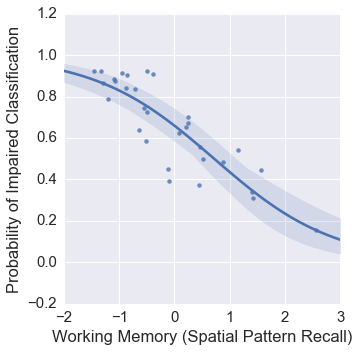

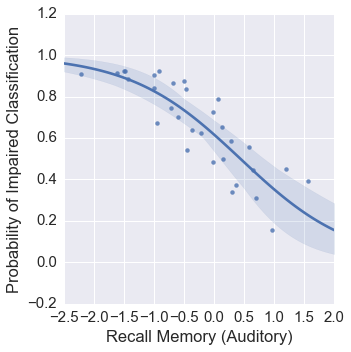

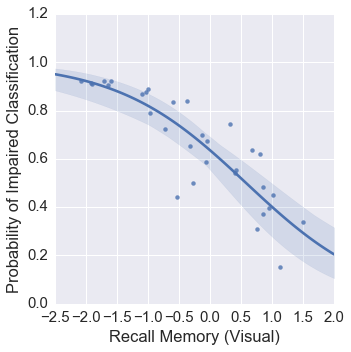

In [105]:
#fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True) #, ax2, ax3
sns.lmplot(x="Working Memory (Spatial Pattern Recall)", y="Probability of Impaired Classification", data=probsDF_userClass,
                  logistic=True, n_boot=500, x_jitter=.03, ci=100)
sns.lmplot(x="Recall Memory (Auditory)", y="Probability of Impaired Classification", data=probsDF_userClass,
                  logistic=True, n_boot=500, x_jitter=.03, ci=100)
sns.lmplot(x="Recall Memory (Visual)", y="Probability of Impaired Classification", data=probsDF_userClass,
                  logistic=True, n_boot=500, x_jitter=.03, ci=100)

### Model elvaluation: predict the class labels for the test set, calculate accuracy, precision, recall, fscore and the confusion matrix

In [18]:
# predict class labels for the test set
predictedLR = model_fit.predict(f_testFULL)
predictedLR
#metrics.f1_score(t_testFULL, predicted)
#use F1 when you have imbalanced data

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1])

In [151]:
accuracy_score(t_testFULL, predictedLR)

0.80645161290322576

In [153]:
confusionMatrixLR = confusion_matrix(t_testFULL, predictedLR)
cm = pd.DataFrame(confusionMatrixLR)

In [154]:
confusionMatrixLR

array([[ 7,  5],
       [ 1, 18]])

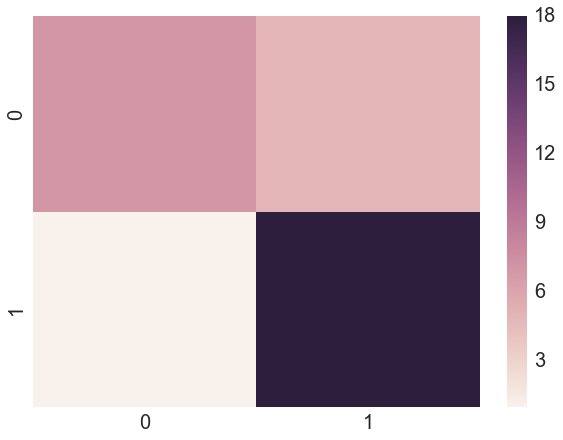

In [155]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns


plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=False)

#ax = sns.heatmap(confusion_matrix_flat, annot=False, fmt="d")

In [23]:
precision_recall_fscore_support(t_testFULL, predictedLR, average='micro')

/Applications/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)


(0.78260869565217395, 0.94736842105263153, 0.8571428571428571, None)

In [24]:
precisionLR, recallLR, thresholds = precision_recall_curve(t_testFULL, predictedLR)
recallLR

array([ 1.        ,  0.94736842,  0.        ])

In [ ]:
roc_curve(t_testFULL, predicted)

In [27]:
## get test set probabilities to calculate AUC under ROC
y_scoreLR = model_fit.decision_function(f_testFULL)

array([  2.46306621e+00,   1.96812765e+00,   2.49066928e+00,
         2.32328400e+00,   1.59627209e-01,   6.34379836e-01,
        -6.65675891e-01,   9.68266004e-01,  -1.70699523e+00,
         3.49176047e-01,   1.31533118e+00,   1.66113837e+00,
         9.66543309e-04,   4.98141150e-01,   5.61553132e-01,
         1.63530354e+00,  -8.03925898e-01,  -5.20471865e-01,
         1.07314006e+00,   2.06360148e+00,   2.27425227e+00,
        -1.94782113e-01,   2.38026758e+00,   7.17436248e-01,
         8.44104756e-01,  -2.25203391e-01,  -4.28120760e-01,
        -7.11475661e-02,   1.87232826e+00,   2.23754855e-01,
         2.48173970e+00])

In [26]:
fprLR, tprLR, thresholds = roc_curve(t_testFULL, y_scoreLR)
roc_auc_testLR = auc(fprLR, tprLR)
roc_auc_testLR

0.86842105263157887

In [136]:
auc = metrics.auc(fprLR,tprLR)
auc

0.86842105263157887

In [140]:
tprLR

array([ 0.05263158,  0.47368421,  0.47368421,  0.68421053,  0.68421053,
        0.73684211,  0.73684211,  0.84210526,  0.84210526,  0.94736842,
        0.94736842,  1.        ,  1.        ])

### Plotting the ROC curves from the logistic regression model against random forest and SVM (code for these models is below)

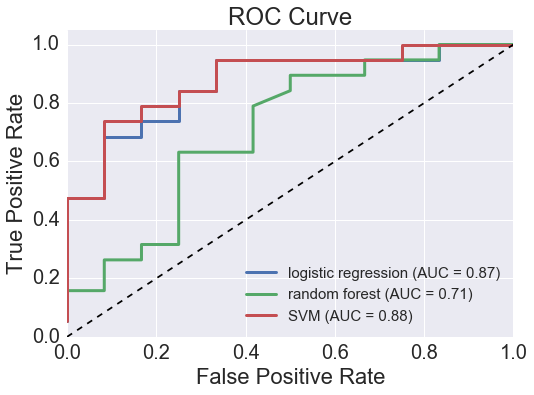

In [139]:
# Plot of a ROC curve for a specific class
plt.figure()
sns.set(font_scale=2)

#plot logistic regression
plt.plot(fprLR, tprLR, linewidth=3.0, label='logistic regression (AUC = %0.2f)' % roc_auc_testLR)
#plot random forest
plt.plot(fprRF, tprRF, linewidth=3.0, label='random forest (AUC = %0.2f)' % roc_auc_testRF)
#plot SVM
plt.plot(fprSVM, tprSVM, linewidth=3.0, label='SVM (AUC = %0.2f)' % roc_auc_testSVM)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right", prop={'size':15})

plt.show()

In [ ]:
#from statsmodels, try logit for comparison

In [ ]:
logit = sm.Logit(t_trainFULL, f_trainFULL)

# fit the model
#result = logit.fit()
#print result.summary()

### Random Forest

In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

from sklearn.cross_validation import train_test_split

# Set the seed
np.random.seed(12)

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=1000, # Number of trees
                                  max_features=5,    # Num features considered
                                  oob_score=True)    # Use OOB scoring*
# Train the model
rf_model.fit(X=f_trainFULL[:,[0,5,6,9,11,12]],
             y=t_trainFULL)

#print("OOB accuracy: ")
print(rf_model.oob_score_)

#feature importance
# for feature, imp in zip(features, rf_model.feature_importances_):
#     print(feature, imp)

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.731707317073


### Evaluate the model using 10-fold cross-validation

In [128]:
cv_scoresRF = cross_val_score(RandomForestClassifier(), f_trainFULL[:,[0,5,6,9,11,12]], y_arr, scoring='accuracy', cv=10)
print cv_scoresRF
print cv_scoresRF.mean()

[ 0.69230769  0.76923077  0.53846154  0.84615385  0.75        0.83333333
  0.66666667  0.58333333  0.66666667  0.81818182]
0.716433566434


### Model evaluation: predict the class labels for the test set, calculate accuracy, precision, recall, fscore and the confusion matrix

In [100]:
predictedRF = rf_model.predict(f_testFULL[:,[0,5,6,9,11,12]])

In [101]:
from sklearn.metrics import auc, accuracy_score, confusion_matrix, precision_recall_fscore_support, roc_curve

accuracy_score(t_testFULL, predictedRF)

0.67741935483870963

In [102]:
precision_recall_fscore_support(t_testFULL, predictedRF, average='micro')

/Applications/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)


(0.68000000000000005, 0.89473684210526316, 0.77272727272727271, None)

In [103]:
confusion_matrixRF = confusion_matrix(t_testFULL, predictedRF)
confusion_matrixRF

array([[ 4,  8],
       [ 2, 17]])

In [104]:
predictedRF

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1])

### Use probabilities to calculate auc score

In [106]:
probsRF = rf_model.predict_proba(f_testFULL[:,[0,5,6,9,11,12]])
#probsRF

here replacing predictedRF with probsRF

In [107]:
roc_curve(t_testFULL, probsRF[:,[1]])
fprRF, tprRF, _ = roc_curve(t_testFULL, probsRF[:,[1]])
roc_auc_testRF = auc(fprRF, tprRF)
roc_auc_testRF

0.70833333333333326

### Support Vector Machines (SVM)

In [141]:
#just taking the subset of columns identified in the logistic regression
X = f_trainFULL[:,[0,5,6,9,11,12]]
y = t_trainFULL

In [142]:
from sklearn import svm

# Create SVM classification object 
svm_model = svm.SVC(kernel='linear', C=0.1, gamma=1, random_state=5, probability=True) 
svm_model.fit(X, y)
#score = model.score(X, y)
#Predict Output
predictedSVM = svm_model.predict(f_testFULL[:,[0,5,6,9,11,12]])

print svm_model.score(X, y), svm_model.score(f_testFULL[:,[0,5,6,9,11,12]], t_testFULL)

0.772357723577 0.806451612903


/Applications/anaconda/lib/python2.7/site-packages/sklearn/svm/base.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)


### Evaluate the model using 10-fold cross-validation

In [143]:
svm_cv_scores = cross_val_score(svm.SVC(kernel='linear', C=0.1, gamma=1, random_state=5), 
                            f_trainFULL[:,[0,5,6,9,11,12]], y_arr, scoring='accuracy', cv=10)
print svm_cv_scores
print svm_cv_scores.mean()

[ 0.84615385  0.84615385  0.61538462  0.61538462  0.83333333  0.66666667
  0.5         0.66666667  0.91666667  0.72727273]
0.723368298368


In [144]:
# predict class labels for the test set
predictedSVM = svm_model.predict(f_testFULL[:,[0,5,6,9,11,12]])
print predictedSVM

[1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 0 0 1 1 1]


### Model evaluation: calculating precision, recall, fscore, accuracy, auc and confusion matrix

In [145]:
precision_recall_fscore_support(t_testFULL, predictedSVM, average='micro')

/Applications/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)


(0.78260869565217395, 0.94736842105263153, 0.8571428571428571, None)

In [146]:
from sklearn.metrics import auc, accuracy_score, confusion_matrix, precision_recall_fscore_support, roc_curve
## accuracy on test session

accuracySVM = accuracy_score(t_testFULL, predictedSVM)
accuracySVM

0.80645161290322576

### Calculating predicted probabilities to use for the auc score

In [147]:
probsSVM = svm_model.predict_proba(f_testFULL[:,[0,5,6,9,11,12]])

In [148]:
roc_curve(t_testFULL, probsSVM[:,[1]])
fprSVM, tprSVM, _ = roc_curve(t_testFULL, probsSVM[:,[1]])
roc_auc_testSVM = auc(fprSVM, tprSVM)
roc_auc_testSVM

0.88157894736842102

In [93]:
confusion_matrixSVM = confusion_matrix(t_testFULL, predictedSVM)
confusion_matrixSVM

array([[ 7,  5],
       [ 1, 18]])

In [94]:
svm_model.coef_

array([[ 0.27764839, -0.45154031, -0.43544965, -0.44932451,  0.12049489,
        -0.22406452]])

In [133]:
coef_transpose_svm = np.transpose(svm_model.coef_)
features_svm = df2[['HSC','oneMean', 'twoMean', 
                    'sevenMean','tenMean','twelMean']]
feature_nm_svm=list(features_svm)
feature_names_svm = pd.DataFrame(feature_nm_svm)
coefficients_svm = pd.DataFrame(coef_transpose_svm)
feature_coef_svm = pd.merge(left=feature_names_svm, right=coefficients_svm, left_index=True, right_index=True)
feature_coef_svm.columns = ['Model Features','coefficients'] 
sortedSVM = feature_coef_svm.sort_values(by='coefficients', ascending=0)
sortedSVM_renamed = sorted_renamed = sortedSVM.replace({'Model Features': {'HSC':  'High-Speed Contact Position', 
                           'oneMean': "Recall Memory (Visual)", 'tenMean': 'Visual Information Processing',
                           'twoMean': 'Recall Memory (Auditory)', 'sevenMean': 'Working Memory (Spatial Recall)', 
                           'twelMean': 'Multi-Systems Integration'}})

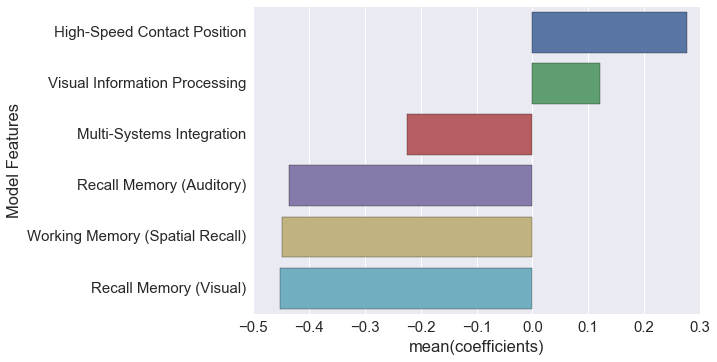

In [134]:
import seaborn as sns
sns.set_style("whitegrid")
tips = sns.load_dataset("tips")

sns.set(font_scale=1.5)
ax = sns.barplot(x="coefficients", y="Model Features", data=sortedSVM_renamed)